In [1]:
import projetannuel as pa 
help(pa)

Help on package projetannuel:

NAME
    projetannuel

DESCRIPTION
    A Python module implemented in Rust. The name of this function must match
    the `lib.name` setting in the `Cargo.toml`, else Python will not be able to
    import the module.

PACKAGE CONTENTS
    projetannuel

CLASSES
    builtins.object
        builtins.LinearModel
        builtins.MLP
        builtins.RBF
        builtins.SVM
        builtins.SVMKernelType
    
    class LinearModel(object)
     |  LinearModel(x, y)
     |  
     |  Methods defined here:
     |  
     |  predict(self, /, x)
     |  
     |  save(self, /, path)
     |  
     |  train_classification(self, /, epochs, learning_rate, algo)
     |  
     |  train_regression(self, /)
     |  
     |  ----------------------------------------------------------------------
     |  Static methods defined here:
     |  
     |  __new__(*args, **kwargs)
     |      Create and return a new object.  See help(type) for accurate signature.
     |  
     |  load(

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Génère des données linéairement séparables en 2D
X, y = make_classification(n_samples=100, n_features=2, 
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep=2.0, random_state=42)

# Convertit les labels en -1 / +1 pour le SVM
y = 2 * y - 1

X_train = X.tolist()
y_train = y.tolist()


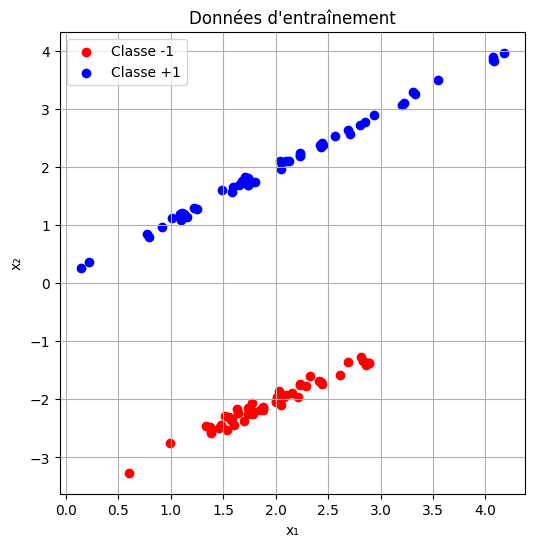

In [3]:
plt.figure(figsize=(6, 6))
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color="red", label="Classe -1")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="Classe +1")
plt.title("Données d'entraînement")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
from projetannuel import SVM, SVMKernelType

# Initialise le modèle avec noyau linéaire
model = SVM(SVMKernelType.Linear())

# Entraîne le modèle
model.train(X_train, y_train)


In [13]:
model.predict([X_train[0]])

[-1.0]

In [12]:
X_train[0]

[2.228311836266957, -1.7571784388988299]

In [14]:
Y_pred =[model.predict([x])[0] for x in X_train]

TypeError: list indices must be integers or slices, not tuple

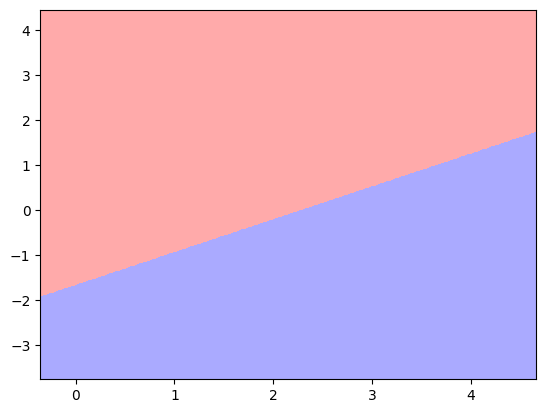

In [20]:
import numpy as np
import matplotlib.pyplot as plt 

h = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(model.predict(grid.tolist())).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=["#AAAAFF", "#FFAAAA"])
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_pred.ravel(), cmap=plt.cm.bwr, edgecolors='k')
plt.title("SVM Prediction Surface")
plt.grid(True)
plt.show()


In [21]:
model.save("test_svm.json")

In [22]:
model2 = SVM.load("test_svm.json")

In [36]:
model2.train(X_train,y_train)

In [37]:
Y_pred2 = [model2.predict([x])[0] for x in X_train]

In [38]:
for i in range(len(Y_pred)):
    if Y_pred[i]!=Y_pred2[i]:
        print("Strange")

In [31]:
type(model2)

SVM

In [ ]:
model2.train()

In [32]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

In [33]:
model2.train(X,Y)

C:\Users\hadinao\AppData\Local\Temp\ipykernel_26700\901456840.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  model2.train(X,Y)


In [34]:
Y_pred2 = [model2.predict([x])[0] for x in X_train]